In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
sns.set()

##### Check for outliers when:
Your dataset comes from a real-world source where errors or unusual cases may occur.

Your data might contain extreme values that could distort your analysis.

Before running any modeling or analysis, it's wise to have a look at your data to see if there are any noticeable outliers.

Remove outliers when:

They're likely due to errors or measurement issues rather than representing true characteristics of the data.

They significantly affect the performance or accuracy of your model, leading to poor predictions or unstable results.

You've verified that removing them improves the performance of your model without sacrificing important information or insights.

In [31]:
rawData = pd.read_csv("C:\\Users\\hp\\Downloads\\insurance.csv")
data = rawData.copy()
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86


In [32]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [33]:
data['sex'] = data['sex'].map({'female' : 0, 'male' : 1})
data['smoker'] = data['smoker'].map({'yes' : 1, 'no' : 0})
data['region'] = data['region'].map({'southwest' : 1, 'southeast' : 2, 'northwest' : 3, 'northeast' : 4})
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,1,1,16884.92
1,18,1,33.77,1,0,2,1725.55
2,28,1,33.00,3,0,2,4449.46
3,33,1,22.70,0,0,3,21984.47
4,32,1,28.88,0,0,3,3866.86
...,...,...,...,...,...,...,...
1333,50,1,30.97,3,0,3,10600.55
1334,18,0,31.92,0,0,4,2205.98
1335,18,0,36.85,0,0,2,1629.83
1336,21,0,25.80,0,0,1,2007.94


In [34]:
data.max()

age           64.00
sex            1.00
bmi           53.13
children       5.00
smoker         1.00
region         4.00
charges    63770.43
dtype: float64

C:\Users\hp\AppData\Local\Temp\ipykernel_9528\3749426276.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'])


<Axes: xlabel='age', ylabel='Density'>

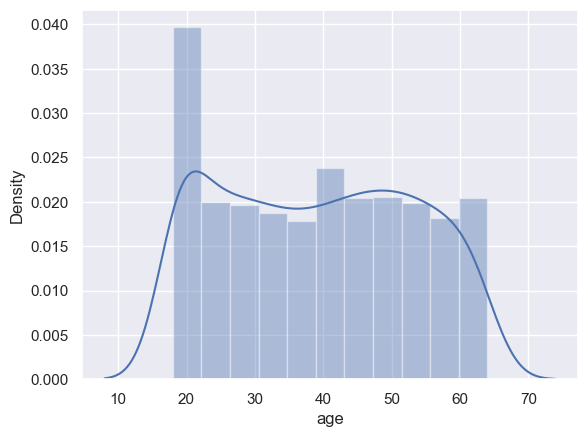

In [35]:
#outliers are important especially for linear regressions cos they can affect accuracy
sns.distplot(data['age'])

C:\Users\hp\AppData\Local\Temp\ipykernel_9528\715337557.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['bmi'])


<Axes: xlabel='bmi', ylabel='Density'>

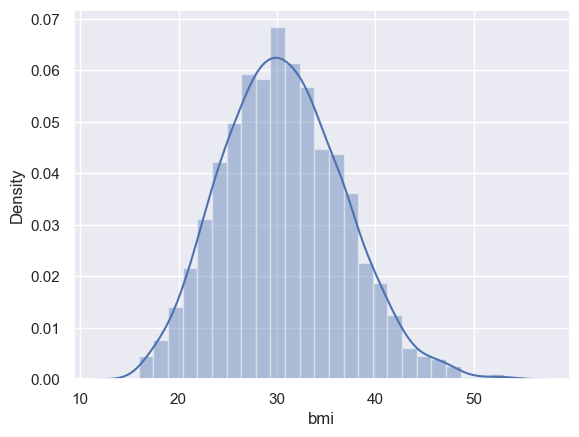

In [36]:
sns.distplot(data['bmi'])

C:\Users\hp\AppData\Local\Temp\ipykernel_9528\3303687566.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['charges'])


<Axes: xlabel='charges', ylabel='Density'>

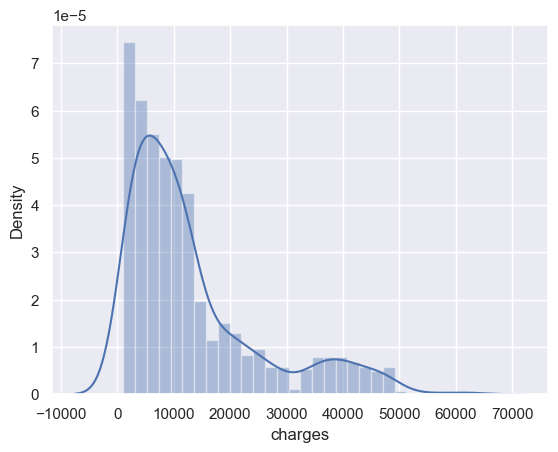

In [37]:
sns.distplot(data['charges'])

C:\Users\hp\AppData\Local\Temp\ipykernel_9528\895082460.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['charges'])


<Axes: xlabel='charges', ylabel='Density'>

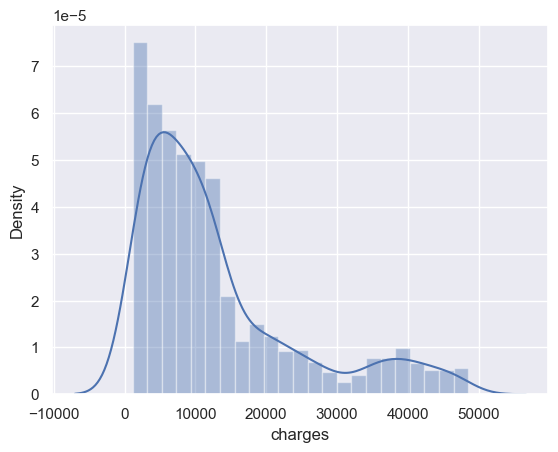

In [38]:
q = data['charges'].quantile(0.99)
data = data[data['charges'] < q]
sns.distplot(data['charges'])

In [39]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [40]:
# changing the target to log helps in Normalization, Homoscedasticity, Linear Relationships, Interpretability of Coefficients, Error Resilience
####Dont check for autocorrelation because it is not a time series data
####leave check for homoscedacity because constant variability is not assumed
#leAVe normality only check when you want to make hypothesis test or statistical inferences

log_charges = np.log(data['charges'])

data["log_charges"] = log_charges

data

C:\Users\hp\AppData\Local\Temp\ipykernel_9528\3290927188.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["log_charges"] = log_charges


,age,sex,bmi,children,smoker,region,charges,log_charges
0,19,0,27.90,0,1,1,16884.92,9.73
1,18,1,33.77,1,0,2,1725.55,7.45
2,28,1,33.00,3,0,2,4449.46,8.40
3,33,1,22.70,0,0,3,21984.47,10.00
4,32,1,28.88,0,0,3,3866.86,8.26
...,...,...,...,...,...,...,...,...
1333,50,1,30.97,3,0,3,10600.55,9.27
1334,18,0,31.92,0,0,4,2205.98,7.70
1335,18,0,36.85,0,0,2,1629.83,7.40
1336,21,0,25.80,0,0,1,2007.94,7.60


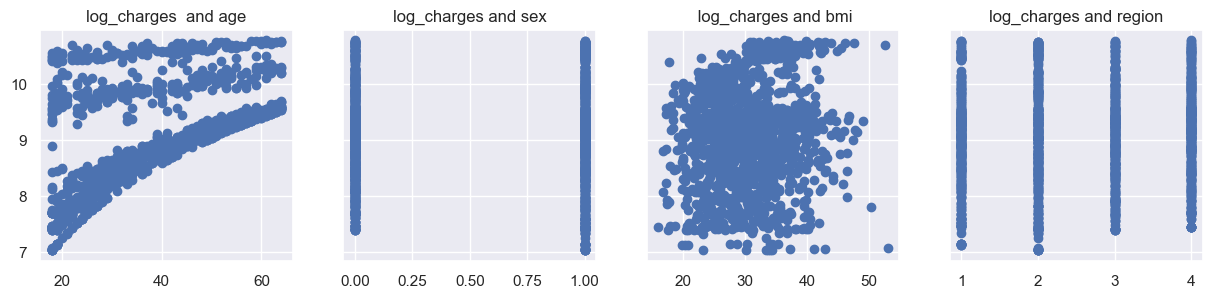

In [41]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize=(15,3))
ax1.scatter(data['age'],data['log_charges'])
ax1.set_title('log_charges  and age')
ax2.scatter(data['sex'],data['log_charges'])
ax2.set_title('log_charges and sex')
ax3.scatter(data['bmi'],data['log_charges'])
ax3.set_title(' log_charges and bmi')
ax4.scatter(data['region'],data['log_charges'])
ax4.set_title('log_charges and region')

plt.show()

In [42]:
#multicollinearity check because you have multiple predictors that are highly correlated
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select the independent variables
variables = data[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]  
# Note the double square brackets

# Create a DataFrame to store the VIF values and feature names
vif = pd.DataFrame()

# Calculate the VIF for each variable
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

# Assign feature names to the DataFrame
vif["features"] = variables.columns

# Display the VIF values and feature names
print(vif)

    VIF  features
0  7.84       age
1  2.00       sex
2 10.25       bmi
3  1.81  children
4  1.24    smoker
5  4.86    region


In [43]:
data_no_multicollinearity =  data.drop(['bmi', 'charges'],axis=1)
data_no_multicollinearity
# This code drops 'bmi' because the vif goes above the limit for a data to have no multicollinearity i.e 1 to 5 or at worst 10 

,age,sex,children,smoker,region,log_charges
0,19,0,0,1,1,9.73
1,18,1,1,0,2,7.45
2,28,1,3,0,2,8.40
3,33,1,0,0,3,10.00
4,32,1,0,0,3,8.26
...,...,...,...,...,...,...
1333,50,1,3,0,3,9.27
1334,18,0,0,0,4,7.70
1335,18,0,0,0,2,7.40
1336,21,0,0,0,1,7.60


In [44]:
targets = data_no_multicollinearity['log_charges'] #dependent var y
inputs = data_no_multicollinearity.drop(['log_charges'],axis=1) #independent var x

In [45]:
from sklearn.preprocessing import StandardScaler
# scaling is done to make sure all values are on the same scales then they should be standardized
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [46]:
inputs_scaled = scaler.transform(inputs) #this is standardizing

In [47]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=None) 

In [48]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [49]:
reg.score(x_train, y_train)

0.7467695640321732

In [50]:
predicted_y_test = reg.predict(x_test)
predicted_y_test
# Don't get confused! x is used to predict y as in inputs are used to predict targets... as input is x and y is target

array([ 8.92794313, 11.03725151,  7.89902049,  9.20252644,  9.2914297 ,
       10.94259086,  8.78973506,  8.00484196,  8.93763961,  8.40772443,
        7.9699806 ,  8.63504818,  8.25010887,  8.2191866 , 11.01355097,
        7.89902049,  9.51504131,  8.95828449,  8.65028962,  8.14181264,
        9.22251484,  9.06986333,  8.56532546,  9.44408121,  8.73117316,
        9.2573762 ,  8.61419088,  8.36709115,  9.75132024,  9.10348731,
        9.34627946, 10.57705905,  9.34073451,  8.52324237,  8.0409407 ,
        8.92918051, 10.29422906,  9.07854939,  8.80089588, 10.18512497,
        9.16044336, 10.63832267,  8.91247473, 10.82808334,  9.04346107,
        8.6129535 ,  9.7446274 ,  9.17919438,  8.95849691,  9.55114006,
        8.85143807,  8.55562898,  9.31265548,  9.43415777,  8.19154697,
        9.15279212,  9.05338452,  8.44112145,  8.05210152,  8.40195251,
        9.72005796,  8.64598204,  9.05338452,  8.86463426,  8.03722856,
        9.11070904, 10.22122371,  8.97951027,  9.47894257,  8.01

In [51]:
y_test

1227    8.88
668    10.73
781     7.04
216     9.25
1264    9.25
845    10.71
1200    8.73
453     7.48
967     8.93
732     8.35
195     7.40
919     8.57
439     7.97
428     8.06
1337   10.28
663     7.04
997     9.54
891     8.89
914     8.57
37      7.74
859     9.30
384     9.02
585     8.47
920     9.51
1127    8.67
1233    9.34
346     8.49
1286    8.22
593     9.64
1201    9.07
812     9.31
674    10.74
227    10.10
832     8.46
713     7.59
774     8.89
266     9.75
178     9.09
43      8.75
725    10.62
733     9.15
1152   10.62
777     8.92
98     10.02
528     9.03
746     9.37
462     9.63
731     9.22
88      8.99
1125    9.56
445     8.90
1199    8.50
964    10.18
1034    9.47
1181    7.96
1126    9.23
610     9.05
657     8.31
1147    7.72
671     8.28
908     9.63
709     8.61
1024    9.06
613     8.82
12      7.51
1140    9.11
1314    9.84
450     8.92
208     9.54
492     7.69
1104    9.92
672     8.39
204     8.87
284     9.17
57     10.44
1266    9.28
1038    7.72

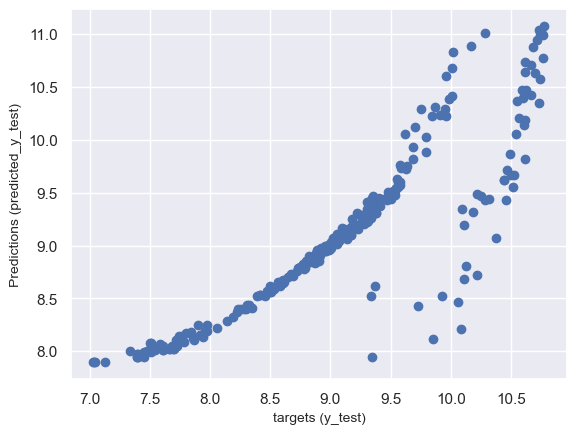

In [52]:
plt.scatter(y_test, predicted_y_test, alpha=1)
plt.xlabel('targets (y_test)', size=10)
plt.ylabel('Predictions (predicted_y_test)', size=10)

plt.show()

In [53]:
summary = pd.DataFrame(np.exp(predicted_y_test), columns=['Prediction'])
summary.head()

,Prediction
0,7539.74
1,62146.61
2,2694.64
3,9922.17
4,10844.68


In [54]:
y_test = y_test.reset_index(drop=True)
summary['Target'] = np.exp(y_test)
summary

,Prediction,Target
0,7539.74,7162.01
1,62146.61,45710.21
2,2694.64,1146.80
3,9922.17,10355.64
4,10844.68,10370.91
5,56533.62,45008.96
6,6566.49,6198.75
7,2995.43,1769.53
8,7613.21,7518.03
9,4481.55,4234.93


In [55]:
summary['Residual'] = summary['Target'] - summary['Prediction']

In [56]:
summary['Difference%'] = np.absolute(summary['Residual']/summary['Target']*100)
summary

,Prediction,Target,Residual,Difference%
0,7539.74,7162.01,-377.73,5.27
1,62146.61,45710.21,-16436.40,35.96
2,2694.64,1146.80,-1547.85,134.97
3,9922.17,10355.64,433.48,4.19
4,10844.68,10370.91,-473.77,4.57
5,56533.62,45008.96,-11524.67,25.61
6,6566.49,6198.75,-367.74,5.93
7,2995.43,1769.53,-1225.90,69.28
8,7613.21,7518.03,-95.18,1.27
9,4481.55,4234.93,-246.62,5.82


In [57]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
summary.sort_values(by=['Difference%'])
summary.describe()

,Prediction,Target,Residual,Difference%
count,265.00,265.00,265.00,265.00
mean,12627.30,13294.31,667.01,26.16
std,12742.08,12236.35,7656.10,30.02
min,2691.31,1131.51,-31549.66,0.00
25%,5046.88,5002.78,-1031.42,3.99
50%,8547.42,9193.84,-328.32,10.78
75%,12987.22,15359.10,312.54,46.44
max,64605.32,47896.79,23419.23,138.15


In [58]:
summary.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
56,8547.42,8547.69,0.27,0.00
100,7444.10,7443.64,-0.45,0.01
65,9051.71,9048.03,-3.68,0.04
150,14397.94,14410.93,12.99,0.09
221,11963.31,11946.63,-16.69,0.14
228,9611.69,9630.40,18.71,0.19
135,7708.18,7727.25,19.07,0.25
62,8547.42,8569.86,22.44,0.26
227,13595.80,13635.64,39.84,0.29
218,10775.34,10807.49,32.14,0.30


### k means Clustering

In [59]:
rawData.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55


In [93]:
data_cluster = data.copy()
data_cluster = data_cluster.iloc[:, [0,6]]
data_cluster.head(3)

,age,charges
0,19,16884.92
1,18,1725.55
2,28,4449.46


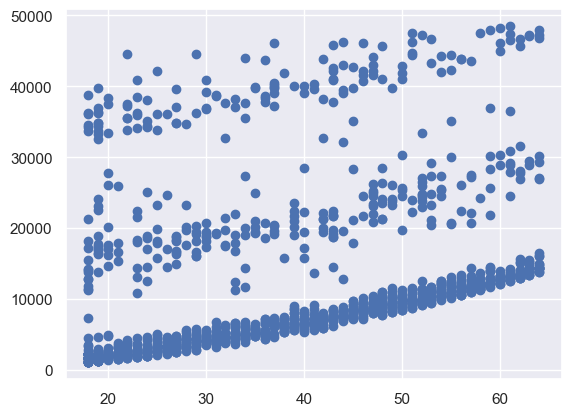

In [94]:
#plot the data
plt.scatter(data_cluster['age'],data_cluster['charges'])

In [95]:
#step 3 standardizing the variables cos you want each axes to have equal weights
from sklearn import preprocessing
data_cluster_scaled = preprocessing.scale(data_cluster)
data_cluster_scaled


array([[-1.43289383,  0.35322063],
       [-1.50421799, -0.972948  ],
       [-0.79097636, -0.73465556],
       ...,
       [-1.50421799, -0.98132165],
       [-1.2902455 , -0.94824378],
       [ 1.56272105,  1.42543534]])

In [96]:
#wcss is within clusters sum of squares
# use elbow to get wcss for each no of clusters to get best no for clusters
wcss = []

for i in range(1,10) :
    Kmeans = KMeans(i)
    Kmeans.fit(data_cluster_scaled)
    wcss.append(Kmeans.inertia_)
wcss
#range should depend on the max no of clusters you want to see

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

[2648.000000000002,
 1460.4207240170044,
 748.8611808422779,
 568.4209815353031,
 418.1837090329426,
 318.4539586898762,
 234.78039817340783,
 183.57201322812818,
 156.8637697694276]

Text(0, 0.5, 'WCSS')

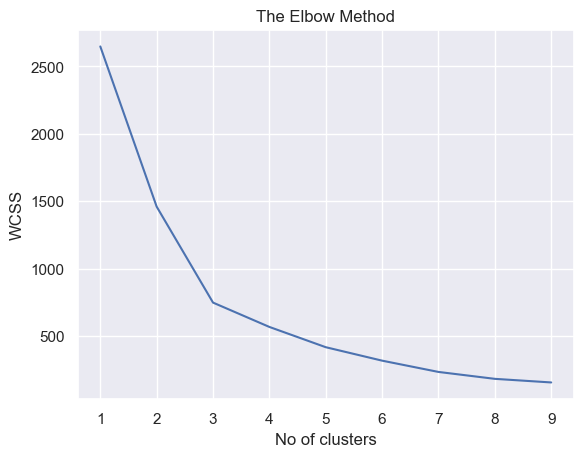

In [97]:
#plot elbow
noOfClusters = range(1,10)
plt.plot(noOfClusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('No of clusters')
plt.ylabel('WCSS')

In [107]:
Kmeans = KMeans(5)
Kmeans.fit(data_cluster_scaled)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

In [108]:
data_cluster_scaled

array([[-1.43289383,  0.35322063],
       [-1.50421799, -0.972948  ],
       [-0.79097636, -0.73465556],
       ...,
       [-1.50421799, -0.98132165],
       [-1.2902455 , -0.94824378],
       [ 1.56272105,  1.42543534]])

In [109]:
data_cluster['cluster'] =  Kmeans.fit_predict(data_cluster_scaled)
data_cluster

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,age,charges,cluster
0,19,16884.92,0
1,18,1725.55,1
2,28,4449.46,1
3,33,21984.47,0
4,32,3866.86,1
...,...,...,...
1333,50,10600.55,3
1334,18,2205.98,1
1335,18,1629.83,1
1336,21,2007.94,1


Text(0, 0.5, 'Charges')

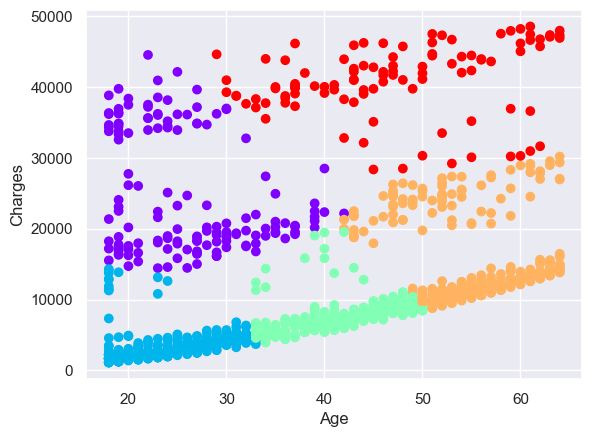

In [110]:
plt.scatter(data_cluster['age'], data_cluster['charges'],  c=data_cluster['cluster'], cmap='rainbow' )
plt.xlabel('Age')
plt.ylabel('Charges')